# 🎬 Netflix Userbase Clustering: Full EDA, Model Comparison & Plotly Dashboard

This notebook uses the **real Netflix Userbase dataset** from Kaggle:

🔗 https://www.kaggle.com/datasets/riturajsingh99/netflix-userbase

It includes:

- ✅ Kaggle API download with correct file path
- ✅ Full Exploratory Data Analysis (EDA)
- ✅ Feature engineering & preprocessing
- ✅ Multiple clustering models & comparison (KMeans, GMM, Agglomerative)
- ✅ PCA-based visualization
- ✅ Plotly dashboard-style interactive visuals


## 1. Install Dependencies

In [1]:
!pip install -q kaggle plotly seaborn


## 2. Configure Kaggle API & Download Dataset

In [2]:
import os

if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
else:
    print("⚠️ kaggle.json not found. Upload it before running this cell.")

!mkdir -p data
!kaggle datasets download -d riturajsingh99/netflix-userbase -p ./data
!unzip -o ./data/netflix-userbase.zip -d ./data

print("Files in data/:", os.listdir("data"))


⚠️ kaggle.json not found. Upload it before running this cell.
Dataset URL: https://www.kaggle.com/datasets/riturajsingh99/netflix-userbase
License(s): unknown
  0%|                                               | 0.00/25.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 25.1k/25.1k [00:00<00:00, 1.59MB/s]
Archive:  ./data/netflix-userbase.zip
  inflating: ./data/Netflix Userbase.csv  
Files in data/: ['.DS_Store', 'Netflix Userbase.csv', 'customer-personality-analysis.zip', 'marketing_campaign.csv', 'netflix-userbase.zip']


## 3. Imports & Settings

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set(style="whitegrid")
pd.set_option("display.max_columns", 100)


## 4. Load Dataset (Correct Path)

In [ ]:
csv_path = "data/Netflix_Userbase.csv"
df = pd.read_csv(csv_path)
print(df.shape)
df.head()


(2500, 10)


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


## 5. Full EDA

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [6]:
df.describe(include="all").T.head(30)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User ID,2500.0,NaN,NaN,NaN,1250.5,721.83216,1.0,625.75,1250.5,1875.25,2500.0
Subscription Type,2500,3,Basic,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly Revenue,2500.0,NaN,NaN,NaN,12.5084,1.686851,10.0,11.0,12.0,14.0,15.0
Join Date,2500,300,05-11-22,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Last Payment Date,2500,26,28-06-23,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,2500,10,United States,451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2500.0,NaN,NaN,NaN,38.7956,7.171778,26.0,32.0,39.0,45.0,51.0
Gender,2500,2,Female,1257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Device,2500,4,Laptop,636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plan Duration,2500,1,1 Month,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isna().sum().sort_values(ascending=False)


User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [8]:
cat_cols = ["Subscription Type", "Country", "Gender", "Device", "Plan Duration", "Account Status"]
for col in cat_cols:
    if col in df.columns:
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts().head(10))



Value counts for Subscription Type:
Subscription Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

Value counts for Country:
Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

Value counts for Gender:
Gender
Female    1257
Male      1243
Name: count, dtype: int64

Value counts for Device:
Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

Value counts for Plan Duration:
Plan Duration
1 Month    2500
Name: count, dtype: int64


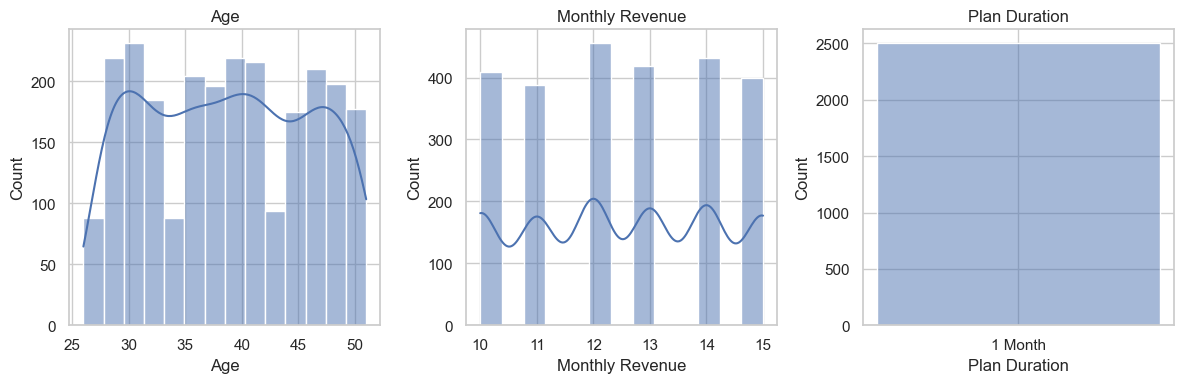

In [9]:
num_cols = ["Age", "Monthly Revenue", "Plan Duration"]
num_cols = [c for c in num_cols if c in df.columns]

plt.figure(figsize=(12, 4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


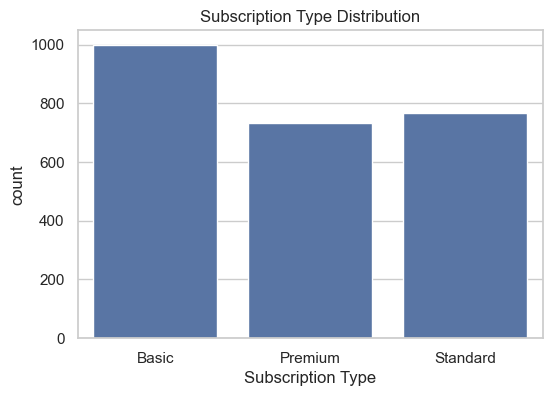

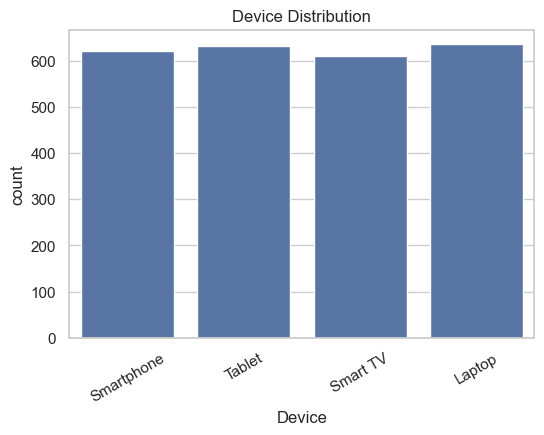

In [10]:
if "Subscription Type" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Subscription Type", data=df)
    plt.title("Subscription Type Distribution")
    plt.show()

if "Device" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Device", data=df)
    plt.title("Device Distribution")
    plt.xticks(rotation=30)
    plt.show()


## 6. Feature Engineering & Preprocessing

In [14]:
# Convert "Plan Duration" from strings like "1 Month" to numeric months
if "Plan Duration" in df.columns:
    df["Plan_Duration_Months"] = (
        df["Plan Duration"]
        .astype(str)
        .str.extract(r"(\d+)")[0]  # extract the number
        .astype(float)
    )

use_cols = []

if "Age" in df.columns:
    use_cols.append("Age")
if "Monthly Revenue" in df.columns:
    use_cols.append("Monthly Revenue")
if "Plan_Duration_Months" in df.columns:
    use_cols.append("Plan_Duration_Months")
if "Account_Age_Days" in df.columns:
    use_cols.append("Account_Age_Days")

# Encoded categoricals
for col in ["Subscription Type", "Country", "Device", "Account Status"]:
    if col in df.columns:
        code_col = col + "_code"
        df[code_col] = df[col].astype("category").cat.codes
        use_cols.append(code_col)

print("Features used for clustering:", use_cols)

df_clust = df.dropna(subset=use_cols).reset_index(drop=True)
X = df_clust[use_cols].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Features used for clustering: ['Age', 'Monthly Revenue', 'Plan_Duration_Months', 'Account_Age_Days', 'Subscription Type_code', 'Country_code', 'Device_code']


## 7. PCA for Visualization

Explained variance by first 2 PCs: 0.3751292064317961


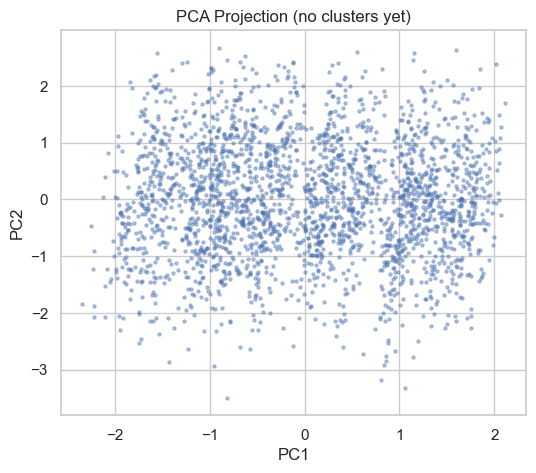

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained variance by first 2 PCs:", pca.explained_variance_ratio_.sum())

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=5, alpha=0.4)
plt.title("PCA Projection (no clusters yet)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## 8. Model Comparison (KMeans, GMM, Agglomerative)

KMeans k=3: silhouette=0.131
KMeans k=4: silhouette=0.128
KMeans k=5: silhouette=0.124
KMeans k=6: silhouette=0.132
KMeans k=7: silhouette=0.135


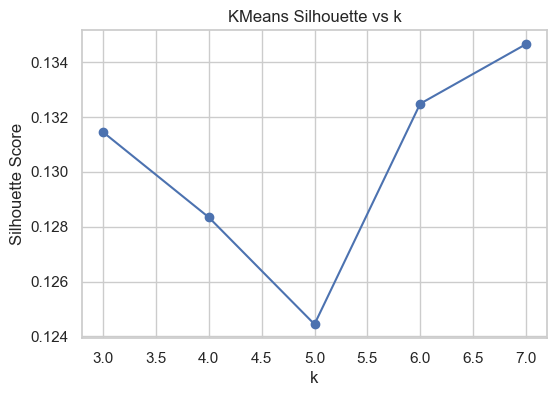

Chosen K by silhouette: 7


In [36]:
def eval_clusters(labels, X):
    return {
        "n_clusters": len(np.unique(labels)),
        "silhouette": silhouette_score(X, labels),
        "davies_bouldin": davies_bouldin_score(X, labels),
        "calinski_harabasz": calinski_harabasz_score(X, labels),
    }

k_range = range(3, 8)
kmeans_sil = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    kmeans_sil.append(sil)
    print(f"KMeans k={k}: silhouette={sil:.3f}")

plt.figure(figsize=(6,4))
plt.plot(list(k_range), kmeans_sil, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("KMeans Silhouette vs k")
plt.show()

BEST_K = k_range[int(np.argmax(kmeans_sil))]
print("Chosen K by silhouette:", BEST_K)


In [37]:
results = []

km = KMeans(n_clusters=BEST_K, random_state=42)
labels_km = km.fit_predict(X_scaled)
df_clust["Cluster_KMeans"] = labels_km
m_km = eval_clusters(labels_km, X_scaled); m_km["model"] = f"KMeans (k={BEST_K})"; results.append(m_km)

gmm = GaussianMixture(n_components=BEST_K, covariance_type="full", random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)
df_clust["Cluster_GMM"] = labels_gmm
m_gmm = eval_clusters(labels_gmm, X_scaled); m_gmm["model"] = f"GMM (k={BEST_K})"; results.append(m_gmm)

agg = AgglomerativeClustering(n_clusters=BEST_K, linkage="ward")
labels_agg = agg.fit_predict(X_scaled)
df_clust["Cluster_Agg"] = labels_agg
m_agg = eval_clusters(labels_agg, X_scaled); m_agg["model"] = f"Agglomerative (k={BEST_K})"; results.append(m_agg)

results_df = pd.DataFrame(results).set_index("model")
results_df


,n_clusters,silhouette,davies_bouldin,calinski_harabasz
model,,,,
KMeans (k=7),7,0.134654,1.755416,287.825720
GMM (k=7),7,0.043793,2.369359,167.503876
Agglomerative (k=7),7,0.084813,2.015967,222.991854


## 9. Visualize KMeans Clusters in PCA Space

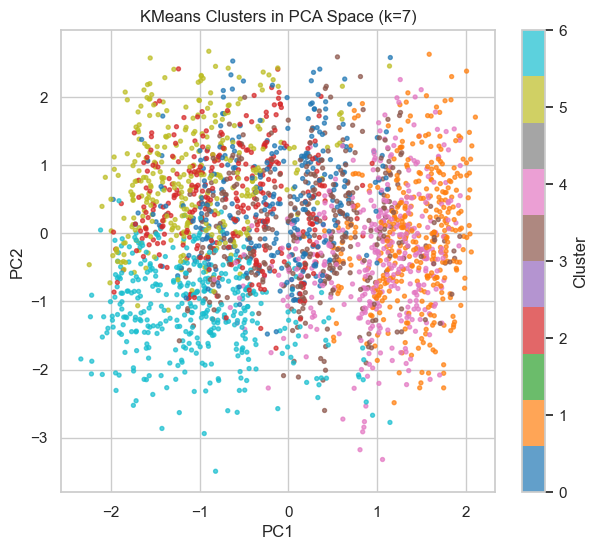

In [38]:
cluster_labels = df_clust["Cluster_KMeans"].values

plt.figure(figsize=(7,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, cmap="tab10", s=8, alpha=0.7)
plt.colorbar(scatter, label="Cluster")
plt.title(f"KMeans Clusters in PCA Space (k={BEST_K})")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## 10. Cluster Profiling

In [ ]:
profile_cols = [
    "Age",
    "Monthly Revenue",
    "Plan_Duration_Months",      # numeric version
    "Account_Age_Days",
    "Subscription Type_code",
    "Country_code",
    "Device_code"
]

profile_cols = [c for c in profile_cols if c in df_clust.columns]

cluster_profile = df_clust.groupby("Cluster_KMeans")[profile_cols].mean().round(2)
cluster_profile

,Age,Monthly Revenue,Plan_Duration_Months,Account_Age_Days,Subscription Type_code,Country_code,Device_code
Cluster_KMeans,,,,,,,
0,44.41,11.62,1.0,301.11,0.25,6.56,2.37
1,41.06,13.50,1.0,282.57,1.83,7.48,2.00
2,44.27,13.54,1.0,311.43,0.95,1.72,1.44
3,36.50,13.84,1.0,336.31,0.57,7.19,0.50
4,36.85,11.03,1.0,383.94,1.77,6.80,1.27
5,38.50,11.10,1.0,287.89,0.33,2.73,0.55
6,31.89,12.80,1.0,367.70,0.47,2.86,2.37


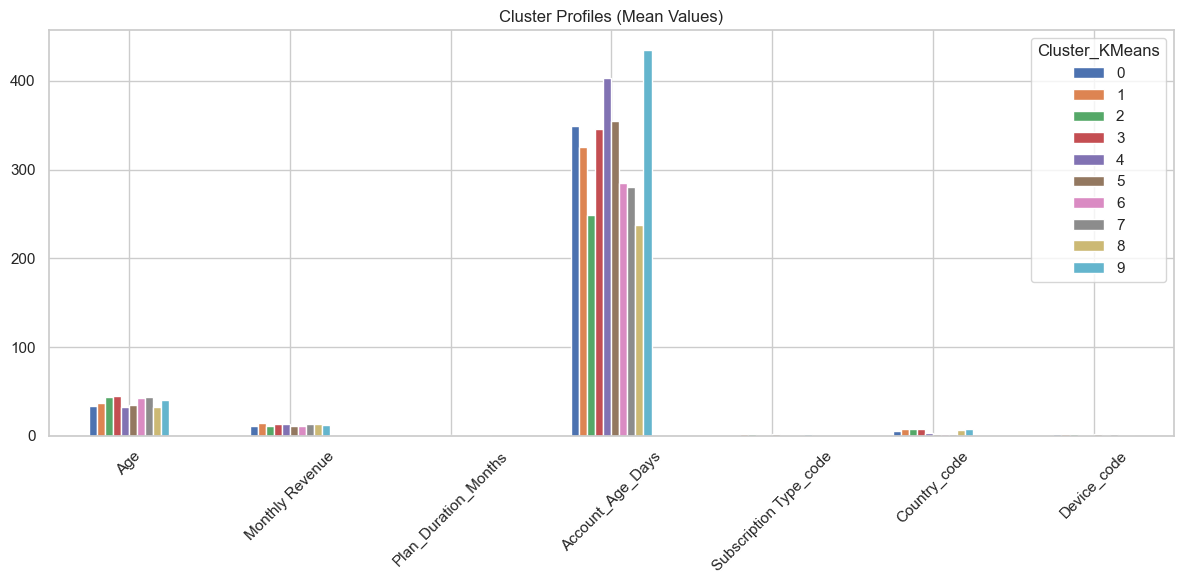

In [ ]:
cluster_profile.T.plot(kind="bar", figsize=(12,6))
plt.title("Cluster Profiles (Mean Values)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 11. Plotly Dashboard-Style Visuals

In [27]:
df_plot = df_clust.copy()
df_plot["Cluster"] = df_plot["Cluster_KMeans"].astype(str)


### 11.1 Interactive PCA Scatter by Cluster

In [ ]:
fig = px.scatter(
    x=X_pca[:,0],
    y=X_pca[:,1],
    color=df_plot["Cluster"],
    labels={"x": "PC1", "y": "PC2", "color": "Cluster"},
    title=f"Netflix Userbase Clusters (KMeans, k={BEST_K}) — PCA Projection",
    opacity=0.7
)
fig.show()


### 11.2 Histograms by Cluster

In [29]:
hist_features = ["Age", "Monthly Revenue", "Plan Duration", "Account_Age_Days"]
hist_features = [c for c in hist_features if c in df_plot.columns]

for col in hist_features:
    fig = px.histogram(
        df_plot,
        x=col,
        color="Cluster",
        nbins=40,
        opacity=0.7,
        barmode="overlay",
        title=f"Distribution of {col} by Cluster"
    )
    fig.show()


### 11.3 Subscription Type by Cluster

In [30]:
if "Subscription Type" in df_plot.columns:
    fig = px.histogram(
        df_plot,
        x="Subscription Type",
        color="Cluster",
        barmode="group",
        title="Subscription Type by Cluster"
    )
    fig.show()


### 11.4 Country by Cluster (Top 10 Countries)

In [31]:
if "Country" in df_plot.columns:
    top_countries = df_plot["Country"].value_counts().head(10).index
    df_top = df_plot[df_plot["Country"].isin(top_countries)]
    fig = px.histogram(
        df_top,
        x="Country",
        color="Cluster",
        barmode="group",
        title="Top 10 Countries by Cluster"
    )
    fig.update_xaxes(categoryorder="total descending")
    fig.show()


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [2]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [3]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21 stored elements and shape (4, 9)>

In [6]:
dense_matrix = X.toarray()
df = pd.DataFrame(dense_matrix, columns=vectorizer.get_feature_names_out())
df

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
